# K-means

## Implementado K-means

### Importar librerias

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

### Preparando los datos de prueba

In [2]:
# Generando la data
X, y, c = make_blobs(n_samples=500, cluster_std=0.8, centers=4, n_features=2, return_centers=True, random_state=42)

In [3]:
# Creando un DataFrame con la data generada anteriormente
df = pd.DataFrame(
    {
        'x1': X[:, 0],
        'x2': X[:, 1],
        'y': y
    }
)
df.head()

,x1,x2,y
0,-7.918909,6.760982,3
1,-9.037137,-6.923545,2
2,6.391721,1.326531,1
3,-2.822884,7.843474,0
4,-5.918656,-7.206570,2


In [4]:
df_centers = pd.DataFrame(
    {
        'x1': c[:, 0],
        'x2': c[:, 1],
    }
)
df_centers.head()

,x1,x2
0,-2.509198,9.014286
1,4.639879,1.973170
2,-6.879627,-6.880110
3,-8.838328,7.323523


### Visualización de datos

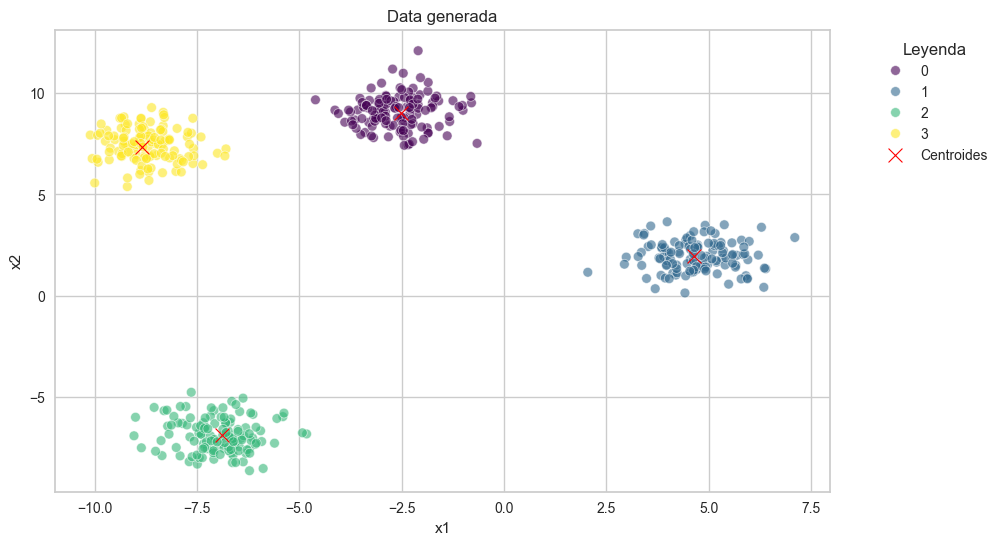

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x1', y='x2', hue=y, data=df, palette='viridis', alpha=0.6)
sns.scatterplot(x='x1', y='x2', data=df_centers, color='red', s=100, marker='x', label='Centroides')
plt.title('Data generada')
plt.legend(title='Leyenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Aplicando K-means

In [6]:
# Creando el modelo KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
# Ajustando el modelo
df_cluster = kmeans.fit_predict(X)
# Agregando la columna cluster al DataFrame
df['cluster'] = df_cluster
# Obteniendo los centroides
kmeans_centers = kmeans.cluster_centers_
# Creando un DataFrame con los centroides
df_kmeans_centers = pd.DataFrame(
    {
        'x1': kmeans_centers[:, 0],
        'x2': kmeans_centers[:, 1]
    }
)

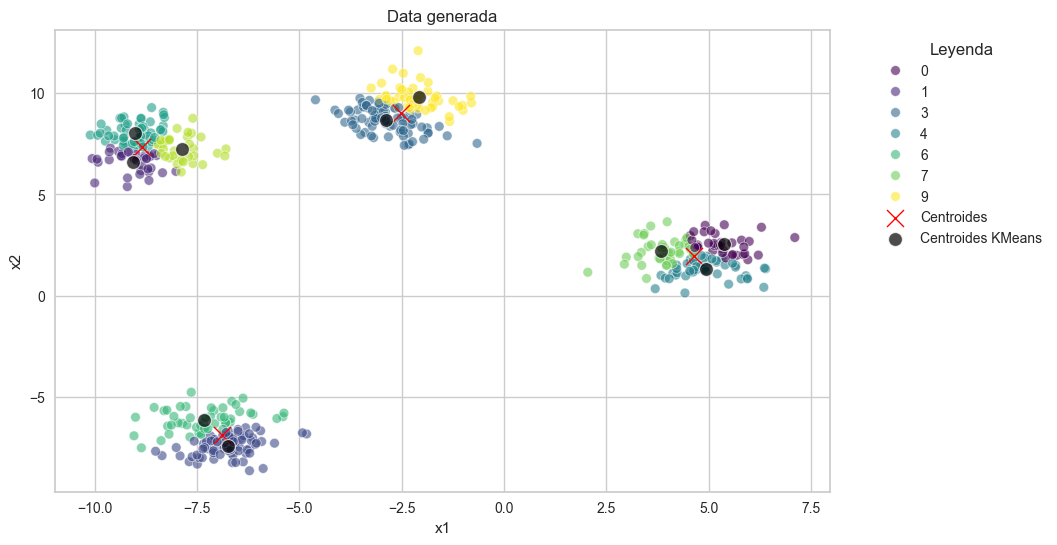

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x1', y='x2', hue='cluster', data=df, palette='viridis', alpha=0.6)
sns.scatterplot(x='x1', y='x2', data=df_centers, color='red', s=150, marker='x', label='Centroides')
sns.scatterplot(x='x1', y='x2', data=df_kmeans_centers, color='black', s=100, marker='o', alpha=0.7,label='Centroides KMeans')
plt.title('Data generada')
plt.legend(title='Leyenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Encontrando K

In [8]:
# Generando una función para visualizar diferentes clusters
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    df_cluster = kmeans.fit_predict(X)
    df['cluster'] = df_cluster
    kmeans_centers = kmeans.cluster_centers_
    df_kmeans_centers = pd.DataFrame(
        {
            'x1': kmeans_centers[:, 0],
            'x2': kmeans_centers[:, 1]
        }
    )
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='x1', y='x2', hue='cluster', data=df, palette='viridis', alpha=0.6)
    sns.scatterplot(x='x1', y='x2', data=df_centers, color='red', s=150, marker='x', label='Centroides')
    sns.scatterplot(x='x1', y='x2', data=df_kmeans_centers, color='black', s=100, marker='o', alpha=0.7,label='Centroides KMeans')
    plt.title('Data generada')
    plt.legend(title='Leyenda', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

-------------- Clusters: 2 --------------


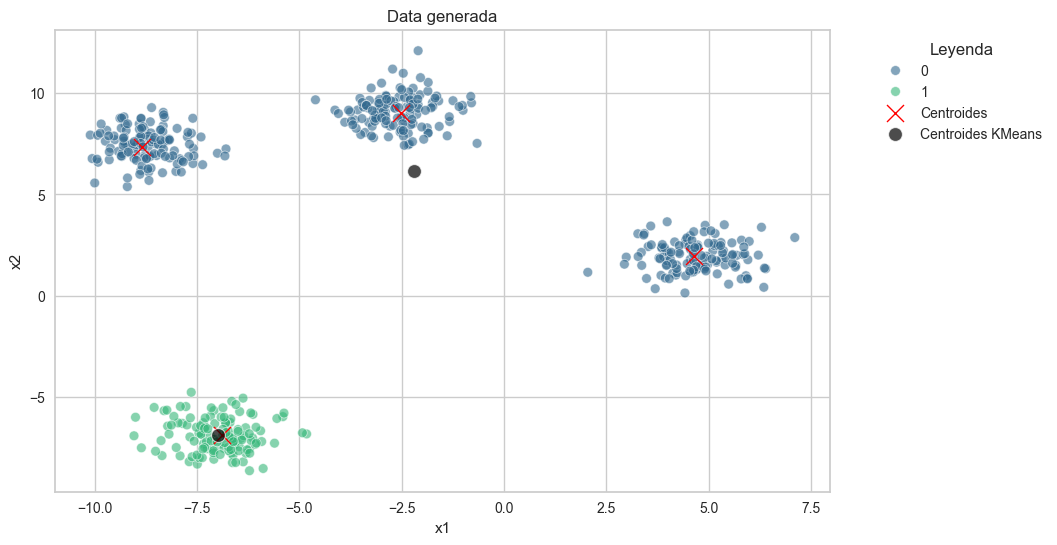

-------------- Clusters: 3 --------------


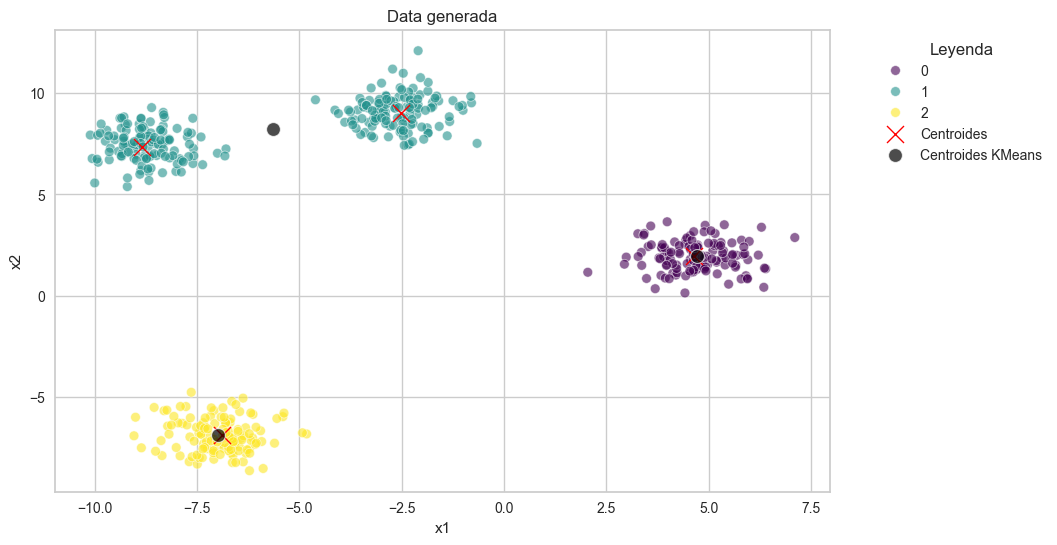

-------------- Clusters: 4 --------------


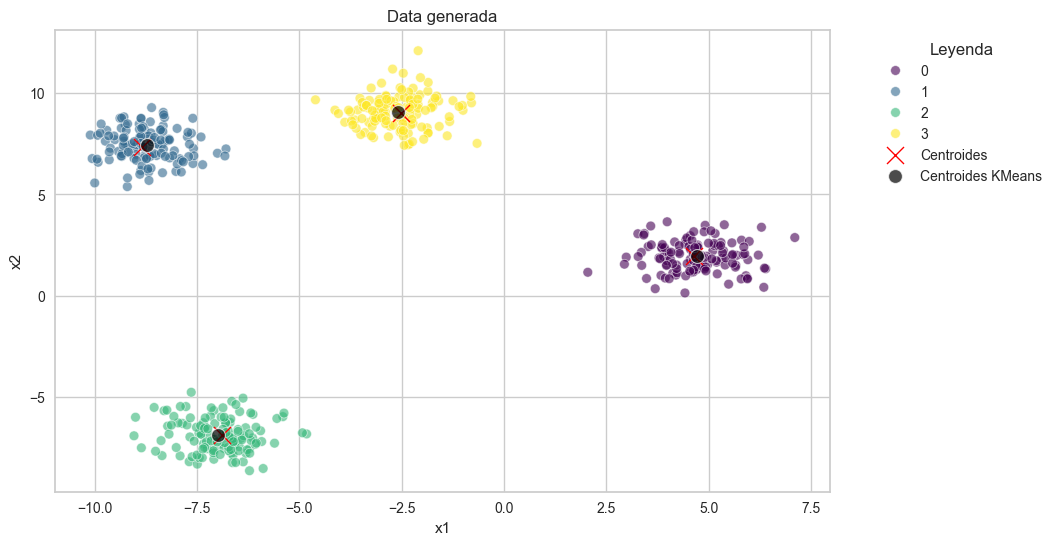

-------------- Clusters: 5 --------------


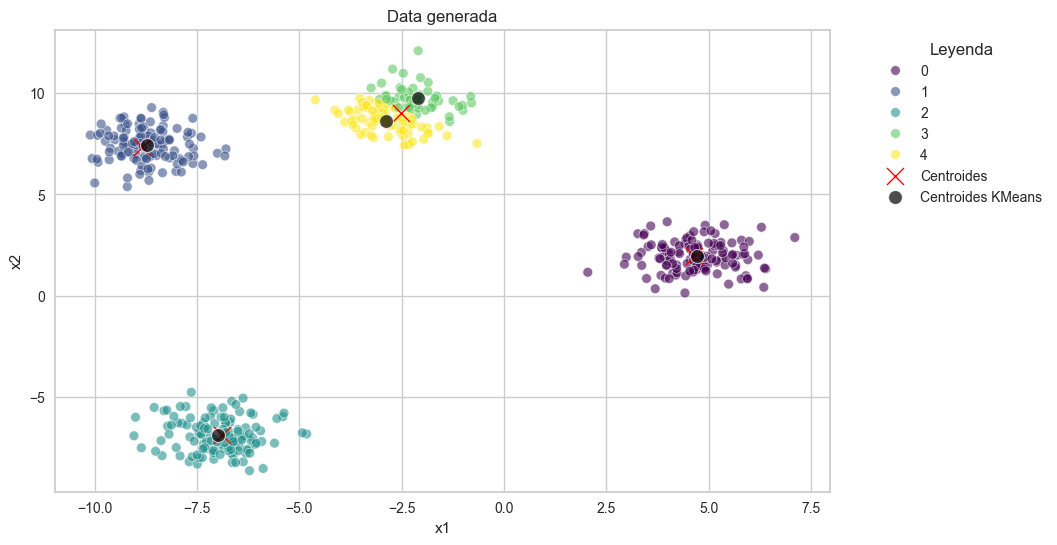

-------------- Clusters: 6 --------------


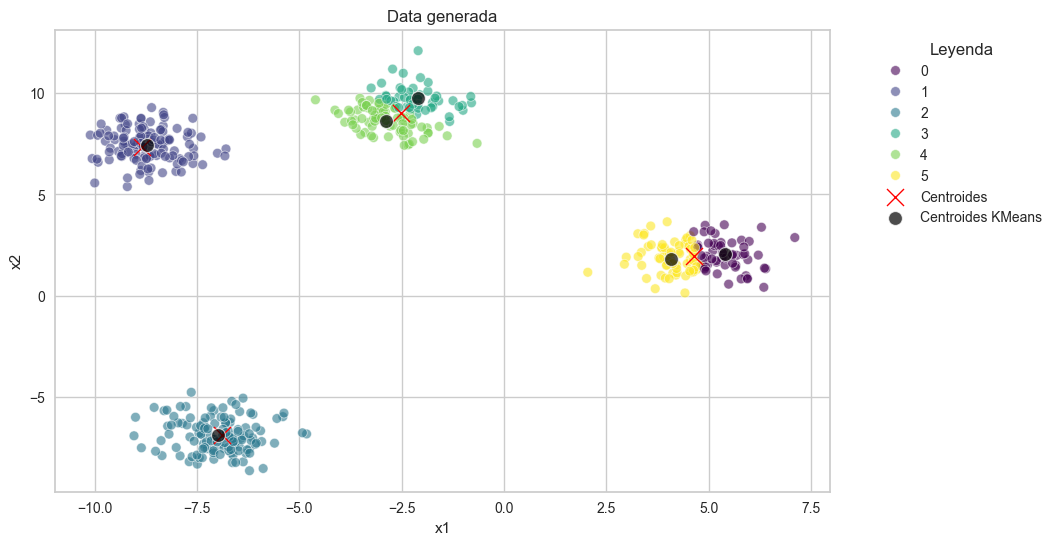

-------------- Clusters: 7 --------------


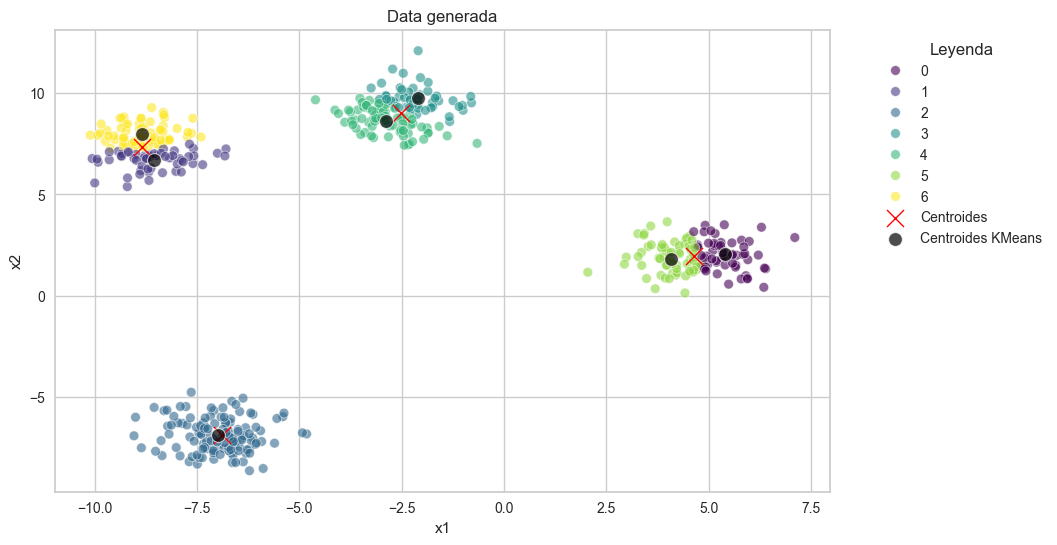

-------------- Clusters: 8 --------------


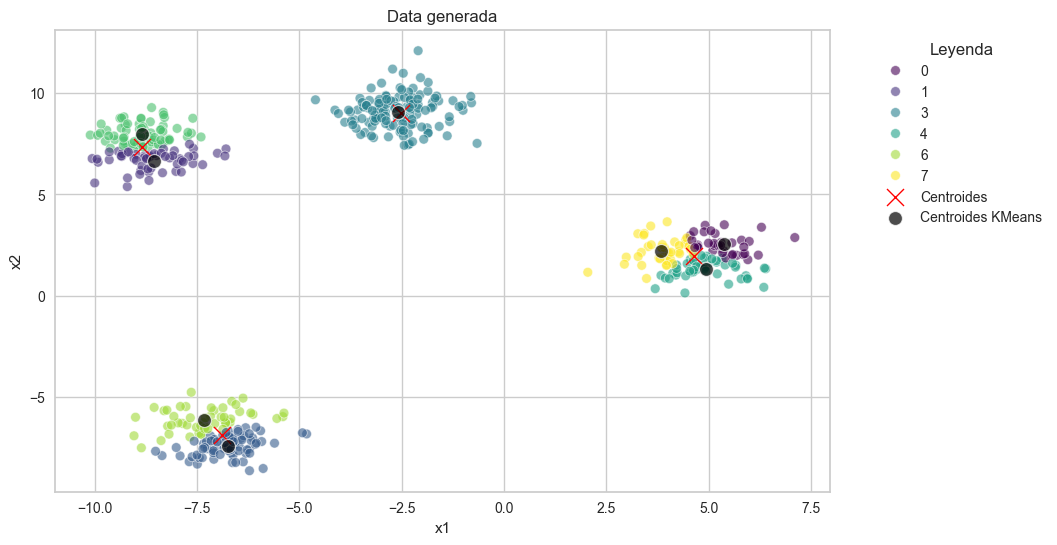

-------------- Clusters: 9 --------------


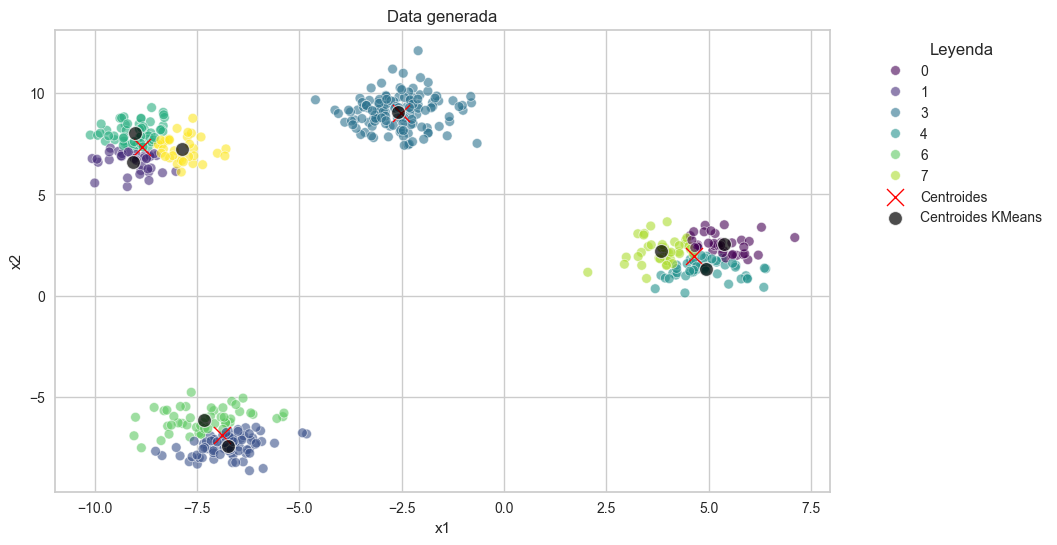

-------------- Clusters: 10 --------------


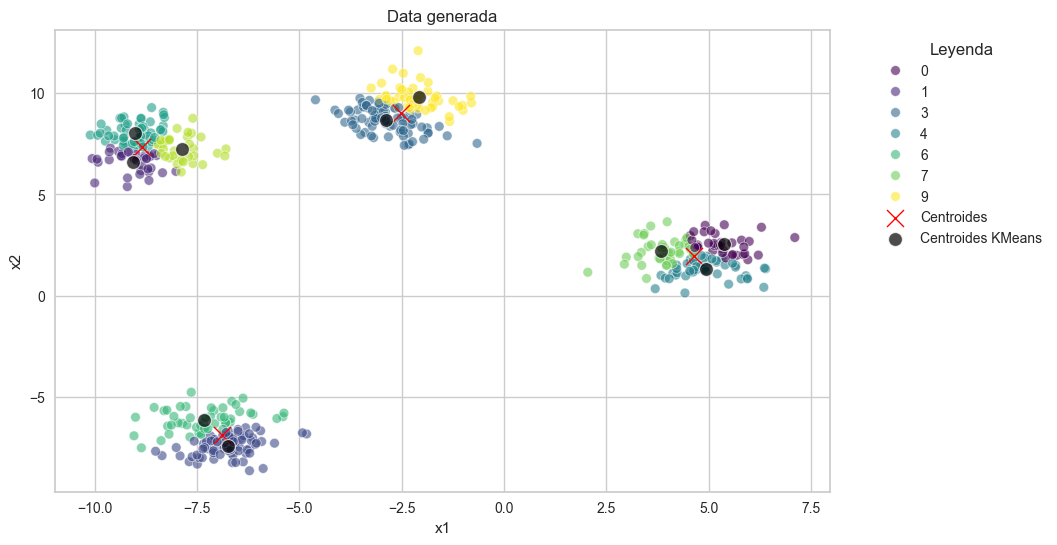

In [9]:
for i in range(2, 11):
    print(f'-------------- Clusters: {i} --------------')
    vis_cluster(i)

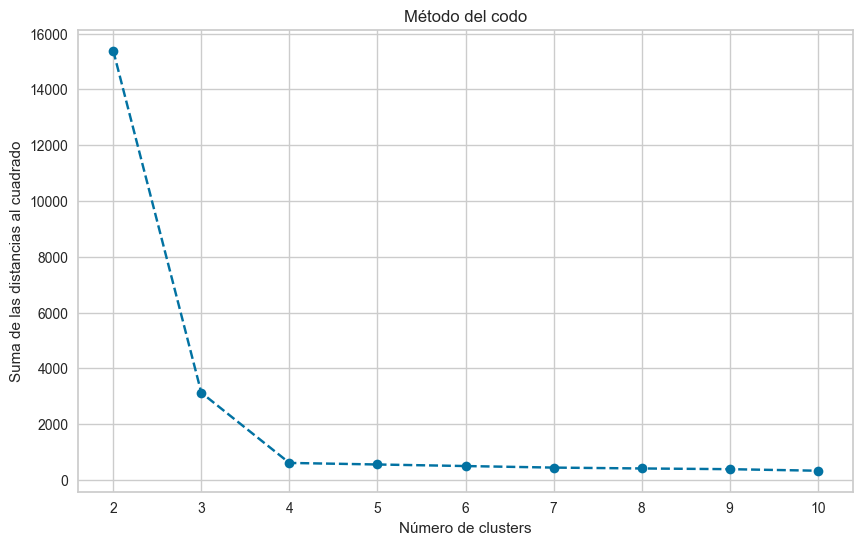

In [10]:
sum_of_squared_distances = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sum_of_squared_distances, marker='o', linestyle='--')
plt.xlabel('Número de clusters')
plt.ylabel('Suma de las distancias al cuadrado')
plt.title('Método del codo')
plt.show()

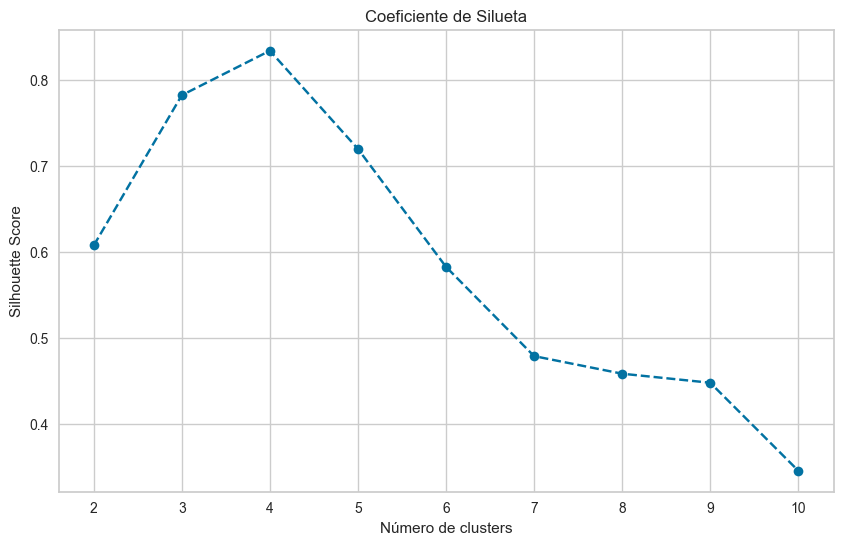

In [11]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Coeficiente de Silueta')
plt.show()

## Evaluando resultados de K-means

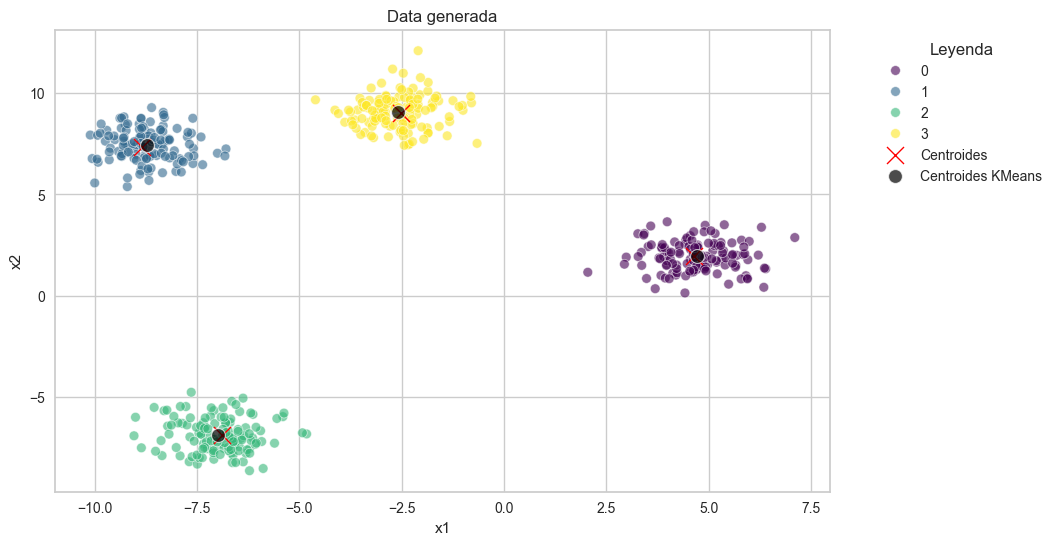

In [12]:
vis_cluster(k=4)

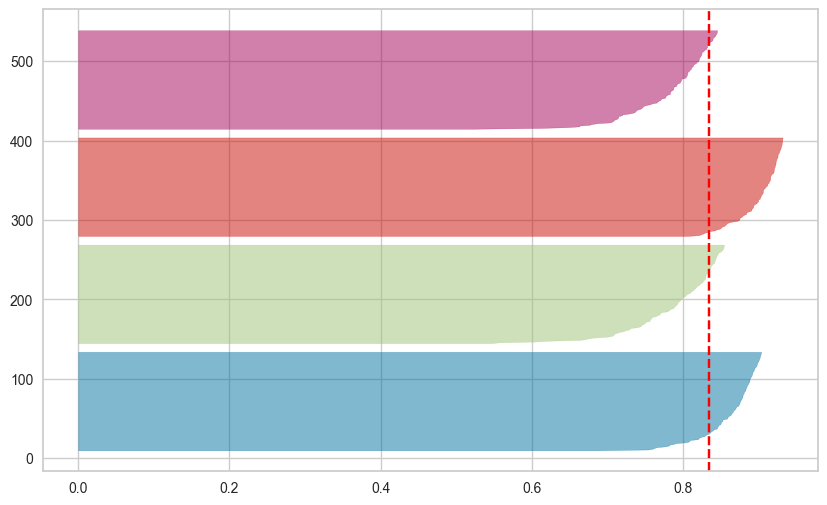

In [13]:
# Visualizando el coeficiente de silueta
plt.figure(figsize=(10, 6))
kmeans = KMeans(n_clusters=4, random_state=42)
vis_cluster = SilhouetteVisualizer(kmeans, colors='yellowbrick')
vis_cluster.fit(X)
plt.show()